# Setting up the initial Envrionment to work with
## Installing kaggle and importing the files I need to the environment

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anwarsawalmeh","key":"5427f7ad744c71f801be9c09b633dd2a"}'}

In [ ]:
#create a kaggle directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd /content/drive/MyDrive/Dissertation\ Dataset
!kaggle datasets download -d emmarex/plantdisease

/content/drive/MyDrive/Dissertation Dataset
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
plantdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


# Resize all the images to be used in the CNN

In [ ]:
dataset_path = '/content/drive/MyDrive/Dissertation Dataset/PlantVillage'

# Iterate over the image folders and label them into one of the classes.


In [ ]:
import os
import cv2
import numpy as np

# Function to assign the correct label based on the folder name
def get_label_from_folder(folder_name):
    if "healthy" in folder_name:
        return 0  # Healthy
    elif any(keyword in folder_name for keyword in ["Early_blight", "Late_blight", "Mold", "Target_Spot", "Septoria_leaf_spot"]):
        return 1  # Fungal
    elif any(keyword in folder_name for keyword in ["YellowLeaf__Curl_Virus", "mosaic_virus"]):
        return 2  # Viral
    elif "Bacterial_spot" in folder_name:
        return 3  # Bacterial
    elif "Spider_mites_Two_spotted_spider_mite" in folder_name:
        return 4  # Mites
    else:
        raise ValueError(f"Unknown label for folder: {folder_name}")

# Function to load images and assign labels
def load_images_with_labels(root_folder):
    images = []
    labels = []

    # Iterate over subfolders
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        if os.path.isdir(subfolder_path):
            # Get the label for this subfolder
            label = get_label_from_folder(subfolder)

            # Load images from the subfolder
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize to (256, 256) and normalize to [0, 1]
                    img = cv2.resize(img, (256, 256))
                    img = img.astype(np.float32) / 255.0
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Set the dataset path and load images
X, y = load_images_with_labels(dataset_path)

# Save the data for quick future access
np.savez_compressed('/content/drive/MyDrive/Dissertation Dataset/plant_disease_data.npz', images=X, labels=y)

print("Data saved successfully!")
print(f"Images Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")

Data saved successfully!
Images Shape: (20638, 256, 256, 3)
Labels Shape: (20638,)


# Image Sanity Checks

Label =  3
Shape of X[2000] =  (256, 256, 3)


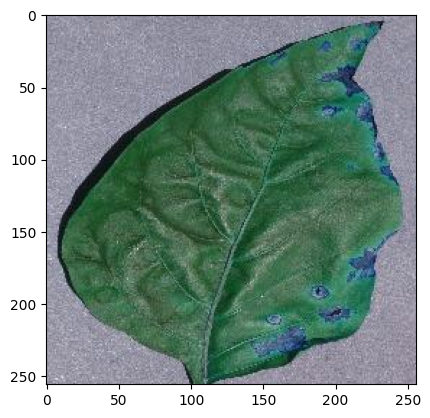

Label =  3


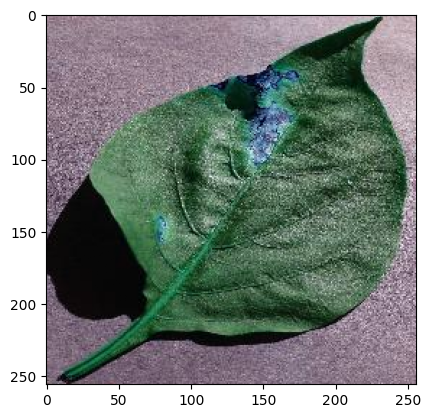

In [ ]:
# print one of the images in X
import matplotlib.pyplot as plt
plt.imshow(X[0])
print("Label = ", y[0])
print("Shape of X[2000] = ", X[2000].shape)
plt.show()
plt.imshow(X[1])
print("Label = ", y[1])
plt.show()

# Loading The Data from the NPZ file. No need to rerun

In [ ]:
# Load the saved data
import numpy as np
data = np.load('/content/drive/MyDrive/Dissertation Dataset/plant_disease_data.npz')
X = data['images']
y = data['labels']


print("Data Loaded Successfully")
print("Images Shape: ", X.shape)
print("Labels Shape: ", y.shape)

Data Loaded Successfully
Images Shape:  (20638, 256, 256, 3)
Labels Shape:  (20638,)


Label =  0
Shape of X[2000] =  (256, 256, 3)


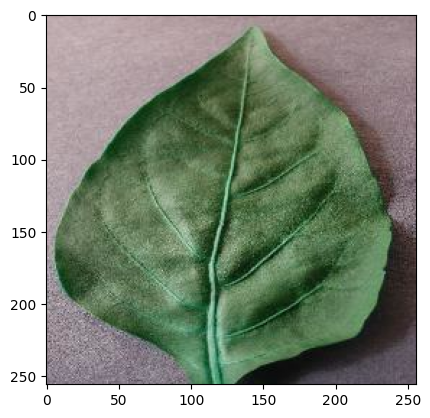

Label =  3


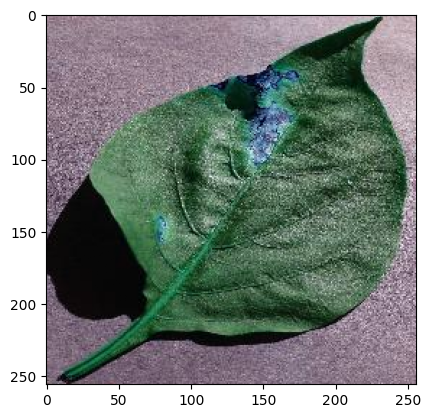

In [ ]:
# print one of the images in X
import matplotlib.pyplot as plt
plt.imshow(X[2000])
print("Label = ", y[2000])
print("Shape of X[2000] = ", X[2000].shape)
plt.show()
plt.imshow(X[1])
print("Label = ", y[1])
plt.show()

## Split  the dataset so that I can use some for Training and some for Testing

In [ ]:
# Looking at Convolutional Neural Networks in Python and Pytorch
# We are gonna import the images to be used in the CNN - MNIST data set
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split to create a Train and Test variables for the data

In [ ]:
from sklearn.model_selection import train_test_split

# Define split ratios
train_ratio = 0.7  # 70% for training
val_ratio = 0.15  # 15% for validation
test_ratio = 0.15  # 15% for testing

# Step 1: Split into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=(1 - train_ratio), random_state=42, stratify=y)

# Step 2: Split remaining data into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42, stratify=y_rem)

# Confirm split sizes
print("Training Set: ", X_train.shape, y_train.shape)
print("Validation Set: ", X_val.shape, y_val.shape)
print("Testing Set: ", X_test.shape, y_test.shape)


Training Set:  (14446, 256, 256, 3) (14446,)
Validation Set:  (3096, 256, 256, 3) (3096,)
Testing Set:  (3096, 256, 256, 3) (3096,)


In [ ]:
for x in range(0, 10):
  plt.imshow(X_val[x])
  print("Label = ", y_train[x])
  plt.show()

NameError: name 'plt' is not defined

Shape of Image:  (256, 256, 3)
Label =  1


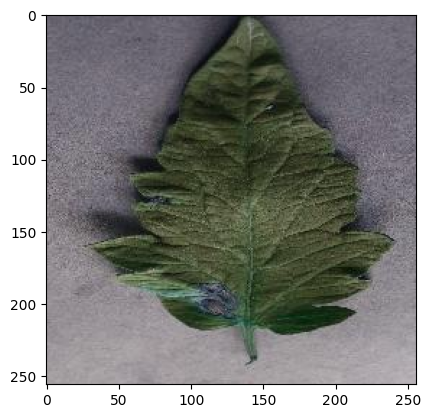

Shape of Image:  (256, 256, 3)
Label =  3


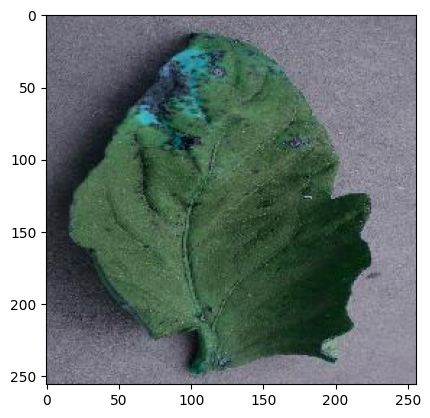

Shape of Image:  (256, 256, 3)
Label =  0


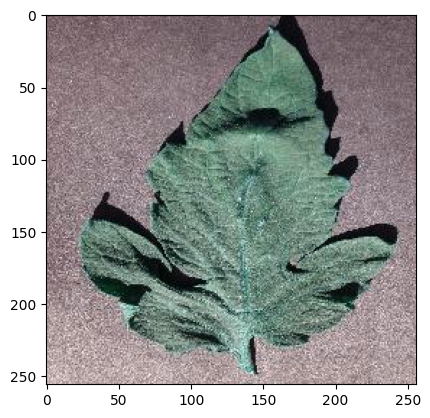

In [ ]:
# Check one image from training set
plt.imshow(X_train[0])
print("Shape of Image: ", X_train[0].shape)
print("Label = ", y_train[0])
plt.show()

# Check one image from validation set
plt.imshow(X_val[100])
print("Shape of Image: ", X_val[100].shape)
print("Label = ", y_val[100])
plt.show()

# Check one image from testing set
plt.imshow(X_test[200])
print("Shape of Image: ", X_test[200].shape)
print("Label = ", y_test[200])

# Check the type of the images

In [ ]:
# Type of the images in each set of X
print("Type of X_train: ", type(X_train))
print("Type of X_val: ", type(X_val))
print("Type of X_test: ", type(X_test))

Type of X_train:  <class 'numpy.ndarray'>
Type of X_val:  <class 'numpy.ndarray'>
Type of X_test:  <class 'numpy.ndarray'>


# Convert the Image types into tensors

In [ ]:
# Convert them into tensors
X_train = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)
y_test = torch.tensor(y_test, dtype=torch.long)

# print the types
print("Type of X_train: ", type(X_train))
print("Type of X_val: ", type(X_val))
print("Type of X_test: ", type(X_test))


Type of X_train:  <class 'torch.Tensor'>
Type of X_val:  <class 'torch.Tensor'>
Type of X_test:  <class 'torch.Tensor'>


In [ ]:
# print the shape of the tensors
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of y_val: ", y_val.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  torch.Size([14446, 3, 256, 256])
Shape of y_train:  torch.Size([14446])
Shape of X_val:  torch.Size([3096, 3, 256, 256])
Shape of y_val:  torch.Size([3096])
Shape of X_test:  torch.Size([3096, 3, 256, 256])


# Use the dataloader to load up the data into it

In [ ]:
# Data loader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Convolutional and Pooling Layer

# Setting up the model Class

---



In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)

        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        # Convolutional Layer 3
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Convolutional Layer 4
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)  # 2x2 Kernel and a Stride of 2. Reduces to (16, 128, 128)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)  # 2x2 Kernel and a Stride of 2. Reduces to (32, 64, 64)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)

        # Flatten the tensor
        x = x.view(x.size(0), -1) # Flatten to (batch_size, 32 * 64 * 64)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Instance of the model + Loss Function Optimizer

In [ ]:
# Create a seed
torch.manual_seed(42)
# Create an Instance of the class
model = CNN()
model

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=5, bias=True)
)

The loss function tells the model how "wrong" its predictions are.
The optimizer tells the model how to correct its errors by adjusting its weights.

In [ ]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the Model

In [ ]:
from threading import current_thread
import time
# So we can measure the time it takes to train and test our model
start_time = time.time()

# Move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create Variables to track
# The number of times the entire dataset has to be worked through the model
epochs = 30
train_losses = []
test_losses = []
train_correct = [] # How many training we get correct
test_correct_list = [] # How many testing we get correct

for i in range(epochs):
  trn_corr = 0 # Training Correct
  tst_corr = 0 # Testing Correct

  # Training Section
  for batch, (X_train, y_train) in enumerate(train_loader):
    batch += 1 # Start the batch at 1
    X_train, y_train = X_train.to(device), y_train.to(device) # Move the data to the GPU
    y_pred = model(X_train) # Get the predicted values from the training set
    loss = criterion(y_pred, y_train) # Calculate the loss. Compare predictions to the correct answers in y_train
    predicted = torch.max(y_pred.data, 1)[1] # Get the predicted class

    batch_corr = (predicted == y_train).sum() # Get the number of correct predictions from this batch
    trn_corr += batch_corr # Add the number of correct predictions to the total number of correct predictions

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      print(f'Epoch {i} - Batch {batch} - Loss {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Testing
  with torch.no_grad(): # We want no gradient so we don't update our weights and biases with test data
    for batch, (X_test, y_test) in enumerate(test_loader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct_list.append(tst_corr)


current_time = time.time()
elapsed_time = current_time - start_time
print(f"Elapsed time: {elapsed_time/60:.2f} minutes")


Epoch 0 - Batch 100 - Loss 0.7825479507446289
Epoch 0 - Batch 200 - Loss 0.65077805519104
Epoch 1 - Batch 100 - Loss 0.37898239493370056
Epoch 1 - Batch 200 - Loss 0.34945952892303467
Epoch 2 - Batch 100 - Loss 0.23987989127635956
Epoch 2 - Batch 200 - Loss 0.22854313254356384
Epoch 3 - Batch 100 - Loss 0.08738121390342712
Epoch 3 - Batch 200 - Loss 0.13601277768611908
Epoch 4 - Batch 100 - Loss 0.16280663013458252
Epoch 4 - Batch 200 - Loss 0.0958620086312294
Epoch 5 - Batch 100 - Loss 0.07761742919683456
Epoch 5 - Batch 200 - Loss 0.12428011000156403
Epoch 6 - Batch 100 - Loss 0.08581414073705673
Epoch 6 - Batch 200 - Loss 0.035537078976631165
Epoch 7 - Batch 100 - Loss 0.026819858700037003
Epoch 7 - Batch 200 - Loss 0.10786449164152145
Epoch 8 - Batch 100 - Loss 0.016517244279384613
Epoch 8 - Batch 200 - Loss 0.0537550151348114
Epoch 9 - Batch 100 - Loss 0.055139463394880295
Epoch 9 - Batch 200 - Loss 0.054034411907196045
Epoch 10 - Batch 100 - Loss 0.018948806449770927
Epoch 10 - B

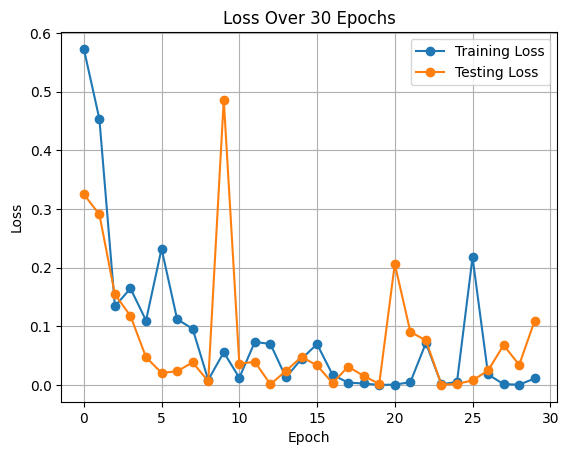

In [ ]:
# Move tensors to CPU and convert to NumPy
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

# Plot the loss
plt.plot(train_losses_cpu, marker='o', linestyle='-', label='Training Loss')
plt.plot(test_losses_cpu, marker='o', linestyle='-', label='Testing Loss')
plt.title('Loss Over 30 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 0: Train Accuracy: 63.57%, Test Accuracy: 81.65%
Epoch 1: Train Accuracy: 84.48%, Test Accuracy: 88.86%
Epoch 2: Train Accuracy: 89.69%, Test Accuracy: 91.28%
Epoch 3: Train Accuracy: 93.10%, Test Accuracy: 90.96%
Epoch 4: Train Accuracy: 94.88%, Test Accuracy: 92.96%
Epoch 5: Train Accuracy: 96.43%, Test Accuracy: 93.93%
Epoch 6: Train Accuracy: 96.21%, Test Accuracy: 95.32%
Epoch 7: Train Accuracy: 97.55%, Test Accuracy: 95.41%
Epoch 8: Train Accuracy: 98.01%, Test Accuracy: 94.67%
Epoch 9: Train Accuracy: 98.47%, Test Accuracy: 95.83%
Epoch 10: Train Accuracy: 98.54%, Test Accuracy: 95.09%
Epoch 11: Train Accuracy: 99.19%, Test Accuracy: 96.38%
Epoch 12: Train Accuracy: 98.49%, Test Accuracy: 96.48%
Epoch 13: Train Accuracy: 99.05%, Test Accuracy: 94.28%
Epoch 14: Train Accuracy: 98.91%, Test Accuracy: 95.96%
Epoch 15: Train Accuracy: 99.58%, Test Accuracy: 96.51%
Epoch 16: Train Accuracy: 98.84%, Test Accuracy: 95.41%
Epoch 17: Train Accuracy: 99.34%, Test Accuracy: 93.28%
Ep

Text(0.5, 1.0, '7-Layer CNN: Training and Testing Accuracy Over 20 Epochs')

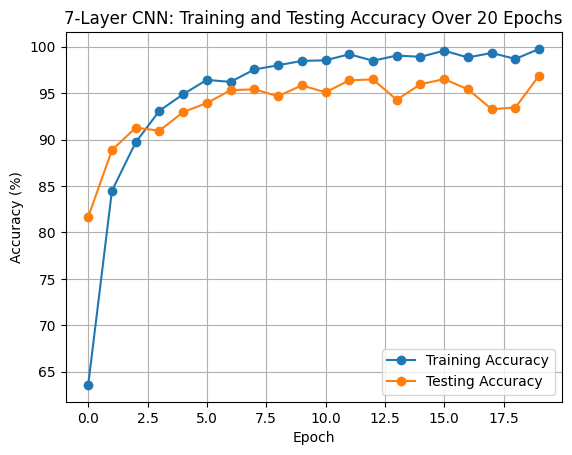

In [ ]:
# Convert tensor to number if necessary, depending on PyTorch version
train_accuracy = [100.0 * correct.item() / len(train_dataset) for correct in train_correct]
test_accuracy = [100.0 * correct.item() / len(test_dataset) for correct in test_correct_list]

# Display accuracies for each epoch
for epoch, (train_acc, test_acc) in enumerate(zip(train_accuracy, test_accuracy)):
    print(f'Epoch {epoch}: Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%')
# plot the percentages
import matplotlib.pyplot as plt
plt.plot(train_accuracy, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(test_accuracy, marker='o', linestyle='-', label='Testing Accuracy')
# grid
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('7-Layer CNN: Training and Testing Accuracy Over 20 Epochs')

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

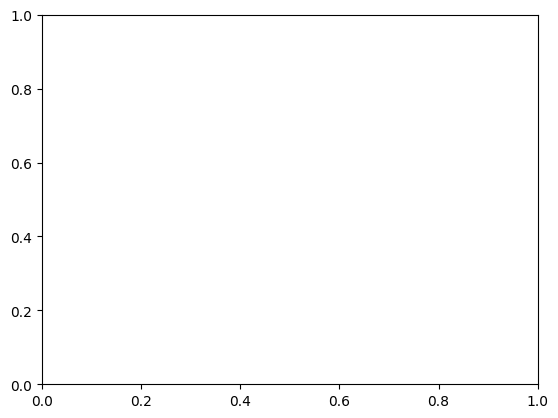

In [ ]:
import matplotlib.pyplot as plt

# Convert losses to scalars if they are tensors
train_losses = [loss for loss in train_losses]
test_losses = [loss for loss in test_losses]

# Plotting
plt.plot(range(epochs), train_losses, label='Training Loss', marker='o', linestyle='-')
plt.plot(range(epochs), test_losses, label='Testing Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over 20 Epochs')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing the Model on an Unseen new Image



In [ ]:
# Grab one image from the val loader
val_dataset[100] # This is an Image

(tensor([[[0.4157, 0.4275, 0.4392,  ..., 0.5020, 0.5059, 0.5176],
          [0.4078, 0.4157, 0.4353,  ..., 0.4941, 0.5020, 0.5137],
          [0.4314, 0.4235, 0.4353,  ..., 0.4902, 0.4980, 0.5020],
          ...,
          [0.4706, 0.4431, 0.4235,  ..., 0.5961, 0.5961, 0.6078],
          [0.4510, 0.4275, 0.4431,  ..., 0.5922, 0.5882, 0.5922],
          [0.4510, 0.4353, 0.5020,  ..., 0.5843, 0.5686, 0.5686]],
 
         [[0.4157, 0.4275, 0.4392,  ..., 0.4902, 0.4941, 0.5059],
          [0.4078, 0.4157, 0.4353,  ..., 0.4824, 0.4902, 0.5020],
          [0.4314, 0.4235, 0.4353,  ..., 0.4784, 0.4863, 0.4902],
          ...,
          [0.4588, 0.4314, 0.4118,  ..., 0.5765, 0.5765, 0.5882],
          [0.4392, 0.4157, 0.4314,  ..., 0.5725, 0.5686, 0.5725],
          [0.4392, 0.4235, 0.4902,  ..., 0.5647, 0.5490, 0.5490]],
 
         [[0.4706, 0.4824, 0.4941,  ..., 0.5490, 0.5529, 0.5647],
          [0.4627, 0.4706, 0.4902,  ..., 0.5412, 0.5490, 0.5608],
          [0.4863, 0.4784, 0.4902,  ...,

In [ ]:
# Grab image without the label
val_dataset[100][0]

tensor([[[0.4157, 0.4275, 0.4392,  ..., 0.5020, 0.5059, 0.5176],
         [0.4078, 0.4157, 0.4353,  ..., 0.4941, 0.5020, 0.5137],
         [0.4314, 0.4235, 0.4353,  ..., 0.4902, 0.4980, 0.5020],
         ...,
         [0.4706, 0.4431, 0.4235,  ..., 0.5961, 0.5961, 0.6078],
         [0.4510, 0.4275, 0.4431,  ..., 0.5922, 0.5882, 0.5922],
         [0.4510, 0.4353, 0.5020,  ..., 0.5843, 0.5686, 0.5686]],

        [[0.4157, 0.4275, 0.4392,  ..., 0.4902, 0.4941, 0.5059],
         [0.4078, 0.4157, 0.4353,  ..., 0.4824, 0.4902, 0.5020],
         [0.4314, 0.4235, 0.4353,  ..., 0.4784, 0.4863, 0.4902],
         ...,
         [0.4588, 0.4314, 0.4118,  ..., 0.5765, 0.5765, 0.5882],
         [0.4392, 0.4157, 0.4314,  ..., 0.5725, 0.5686, 0.5725],
         [0.4392, 0.4235, 0.4902,  ..., 0.5647, 0.5490, 0.5490]],

        [[0.4706, 0.4824, 0.4941,  ..., 0.5490, 0.5529, 0.5647],
         [0.4627, 0.4706, 0.4902,  ..., 0.5412, 0.5490, 0.5608],
         [0.4863, 0.4784, 0.4902,  ..., 0.5373, 0.5451, 0.

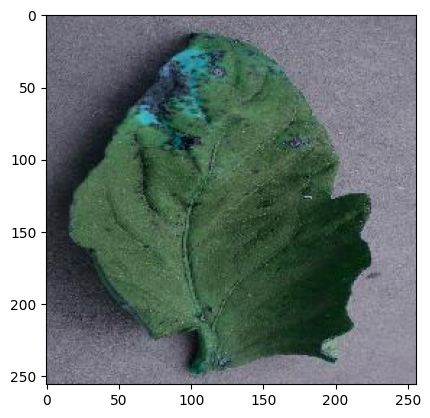

In [ ]:
# Show the image
plt.imshow(val_dataset[100][0].permute(1, 2, 0))
plt.show()

In [ ]:
# Pass all the images in the val_dataset and print them out with actual label and predicted label
model.eval()  # Set model to evaluation mode

all_preds = []  # Store predicted labels
all_actuals = []  # Store actual labels

# Loop through the validation dataset
with torch.no_grad():  # Disable gradient computation
    for data, labels in val_loader:
        # Pass the images through the model
        data = data.to(device)
        labels = labels.to(device)
        predictions = model(data)

        # Apply softmax and get the predicted class
        probs = F.softmax(predictions, dim=1)
        predicted_labels = torch.argmax(probs, dim=1)

        # Store predictions and actual labels
        all_preds.extend(predicted_labels.cpu().numpy())
        all_actuals.extend(labels.cpu().numpy())

# Print comparison
for i in range(len(all_preds)):
    print(f"Image {i}: Actual Label = {all_actuals[i]}, Predicted Label = {all_preds[i]}")

Image 0: Actual Label = 1, Predicted Label = 1
Image 1: Actual Label = 1, Predicted Label = 1
Image 2: Actual Label = 2, Predicted Label = 2
Image 3: Actual Label = 3, Predicted Label = 1
Image 4: Actual Label = 1, Predicted Label = 1
Image 5: Actual Label = 3, Predicted Label = 3
Image 6: Actual Label = 1, Predicted Label = 1
Image 7: Actual Label = 0, Predicted Label = 0
Image 8: Actual Label = 4, Predicted Label = 4
Image 9: Actual Label = 0, Predicted Label = 0
Image 10: Actual Label = 2, Predicted Label = 2
Image 11: Actual Label = 3, Predicted Label = 3
Image 12: Actual Label = 1, Predicted Label = 1
Image 13: Actual Label = 1, Predicted Label = 1
Image 14: Actual Label = 1, Predicted Label = 1
Image 15: Actual Label = 0, Predicted Label = 0
Image 16: Actual Label = 1, Predicted Label = 1
Image 17: Actual Label = 2, Predicted Label = 2
Image 18: Actual Label = 1, Predicted Label = 1
Image 19: Actual Label = 1, Predicted Label = 1
Image 20: Actual Label = 1, Predicted Label = 1
Im

In [ ]:
# Calculate the accuracy
correct = sum([1 for i in range(len(all_preds)) if all_preds[i] == all_actuals[i]])
total = len(all_preds)
accuracy = correct / total
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.96%


In [ ]:
# Pass the image through the model
print(val_dataset[100][0].shape)
input_data = val_dataset[100][0].unsqueeze(0)
print(input_data.shape)
model.eval()
with torch.no_grad():
  input_data = input_data.to(device)
  new_prediction = model(input_data)
  print(new_prediction)

torch.Size([3, 256, 256])
torch.Size([1, 3, 256, 256])
tensor([[-3.0881e+01, -1.6098e+01, -2.2734e+01, -1.1921e-07, -3.8622e+01]],
       device='cuda:0')


In [ ]:
# Get the highest prob
predicted = torch.max(new_prediction.data, 1)[1]
print(predicted)

tensor([3], device='cuda:0')


In [ ]:
# Save this model
torch.save(model.state_dict(), '/content/drive/MyDrive/Dissertation Dataset/cnn_10layer_arc.pth')